# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [19]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [20]:
dataframe = pd.read_csv("Ficheros/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [21]:
dataframe.paginas.value_counts()

1    80
2    55
3    11
4    10
5     7
6     4
9     2
7     1
Name: paginas, dtype: int64

In [22]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [23]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

"\nDataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')\n"

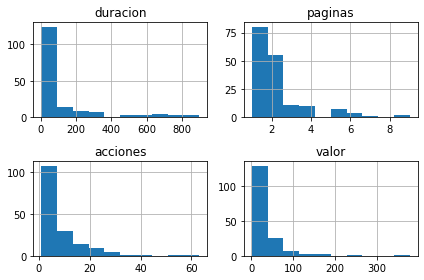

In [24]:
dataframe.drop(['clase'], axis = 1).hist() # 1 es la columna
plt.tight_layout()
'''
DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
'''

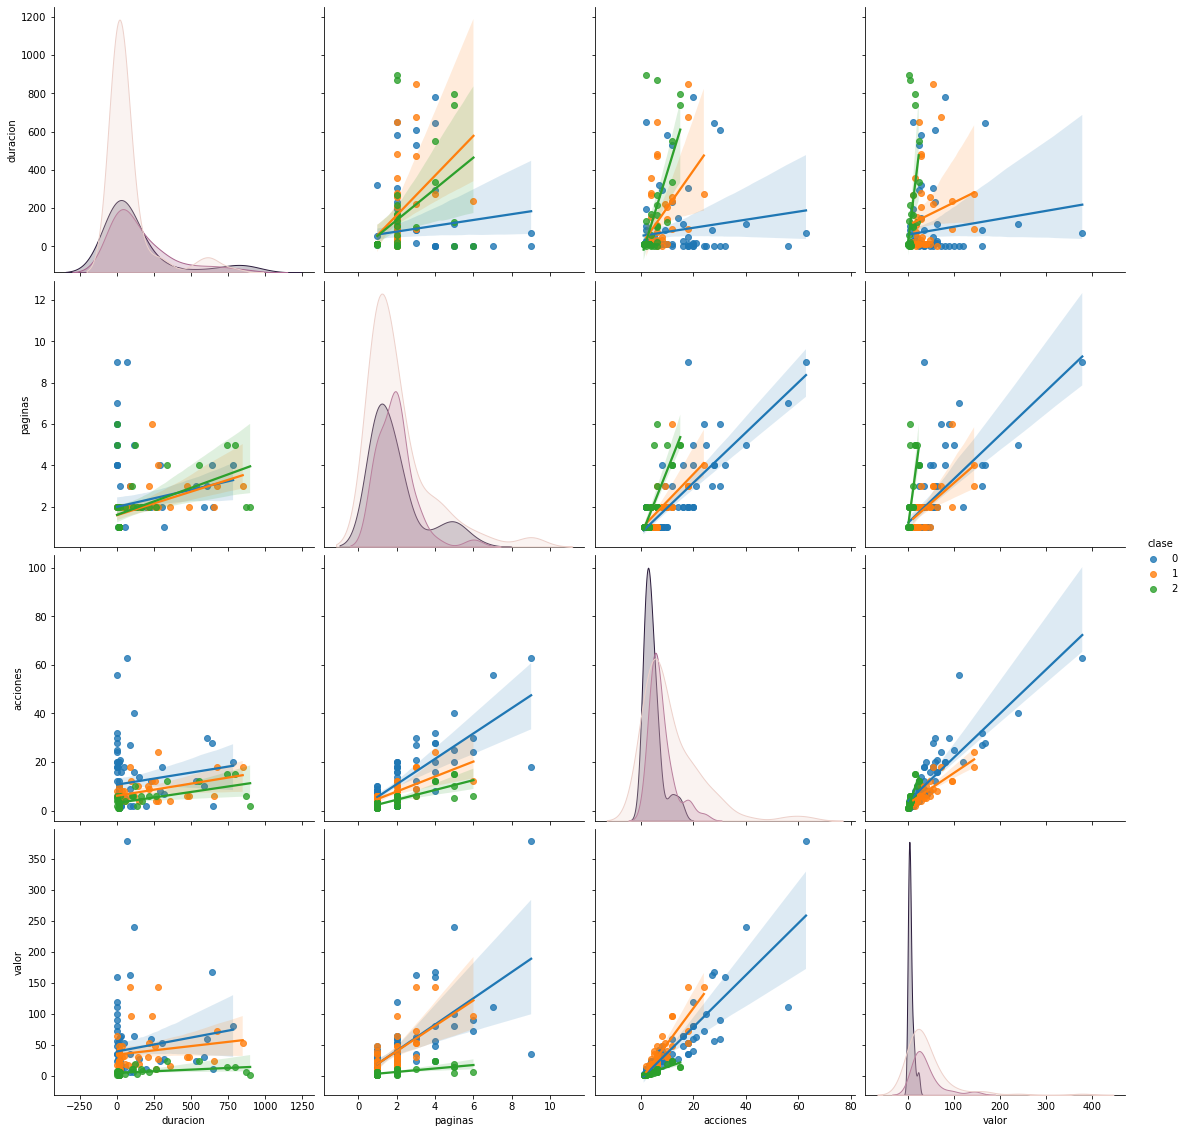

In [25]:
sns.pairplot(dataframe.dropna(),
             hue='clase',
             height=4,
             vars=["duracion", "paginas", "acciones", "valor"],
             kind="reg"); # reg es regresión lineal

## Creamos el modelo

In [26]:
dataframe.drop(['clase'],axis = 1)

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [27]:
# es este caso no dividimos en train y test, es un ejemplo
X = np.array(dataframe.drop(['clase'], axis = 1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [28]:
from sklearn import linear_model

model = linear_model.LogisticRegression(solver='liblinear', multi_class = "auto")
# regresión logística; HIPERPARÁMETRO --> solver, PARÁMETROS --> intercept, coef
model.fit(X, y)

LogisticRegression(solver='liblinear')

In [29]:
predictions = model.predict(X)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
predict_probab = model.predict_proba(X)
np.round(predict_probab, 2)

array([[0.34, 0.14, 0.53],
       [0.34, 0.05, 0.61],
       [0.25, 0.1 , 0.65],
       [0.28, 0.12, 0.6 ],
       [0.39, 0.12, 0.49],
       [0.31, 0.06, 0.63],
       [0.15, 0.22, 0.63],
       [0.34, 0.13, 0.53],
       [0.22, 0.18, 0.61],
       [0.27, 0.09, 0.65],
       [0.26, 0.15, 0.59],
       [0.38, 0.06, 0.56],
       [0.21, 0.1 , 0.69],
       [0.18, 0.04, 0.78],
       [0.05, 0.31, 0.64],
       [0.34, 0.14, 0.52],
       [0.13, 0.08, 0.79],
       [0.63, 0.35, 0.03],
       [0.57, 0.43, 0.  ],
       [0.75, 0.25, 0.  ],
       [0.72, 0.28, 0.  ],
       [0.39, 0.61, 0.  ],
       [0.85, 0.15, 0.  ],
       [0.4 , 0.6 , 0.  ],
       [0.82, 0.18, 0.  ],
       [0.35, 0.65, 0.  ],
       [0.07, 0.93, 0.  ],
       [0.76, 0.24, 0.  ],
       [0.35, 0.55, 0.1 ],
       [0.58, 0.42, 0.  ],
       [0.26, 0.73, 0.  ],
       [0.15, 0.85, 0.  ],
       [0.21, 0.79, 0.  ],
       [0.15, 0.85, 0.  ],
       [0.72, 0.28, 0.  ],
       [0.2 , 0.15, 0.65],
       [0.23, 0.18, 0.59],
 

In [31]:
model.score(X, y) # accuracy

0.7764705882352941

# Adicional: Validación del Modelo

In [32]:
validation_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state = seed)

In [18]:
name = "Logistic Regression"
kfold = model_selection.KFold(n_splits=10) # 10 folds para validación cruzada
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)


[0.92857143 0.64285714 0.64285714 0.78571429 0.85714286 0.78571429
 0.92307692 0.61538462 0.76923077 0.46153846]
Logistic Regression: 0.741209 (0.141337)


In [34]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7058823529411765


In [35]:
model.predict(X_test)

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2], dtype=int64)

In [36]:
acierto = accuracy_score(y_test, predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100,2), "%")
print("Error:", round(error*100,2), "%")

Acierto: 70.59 %
Error: 29.41 %


## Reporte de Resultados

In [37]:
c_matrix = confusion_matrix(y_test, predictions)
c_matrix

array([[13,  2,  1],
       [ 7,  5,  0],
       [ 0,  0,  6]], dtype=int64)

<AxesSubplot:>

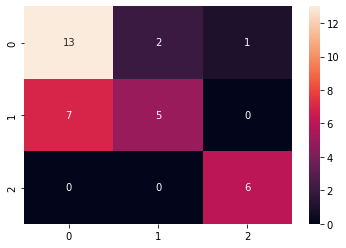

In [38]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True)

<AxesSubplot:>

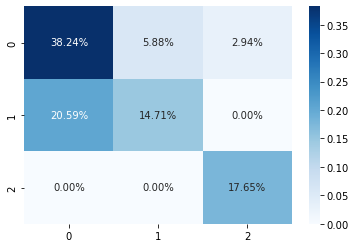

In [39]:
sns.heatmap(c_matrix/c_matrix.sum(), annot=True, cmap="Blues", fmt= ".2%")

[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

# Clasificación de nuevos registros

In [44]:
X_nueva = [[10, 3, 5, 9],
          [5, 8, 11, 99999]]
model.predict(X_nueva)

array([2, 1], dtype=int64)

In [43]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2], dtype=int64)